# Ejercicio 2A

In [4]:
##Carga de Liberías 
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carga de los Datos

grupo1 = np.array([66.180,41.420,81.880,67.205,58.626,64.678,74.439,98.250,39.465,
                   75.064,59.585,66.086,66.616,41.374,66.9,39,55.405,46.824,64.529,
                   64.517,65.166,70.703,77.391,47.910,66.116,63.797,53.051,69.012,
                   60.368,49.748,39.8,34,37.602,66.948,68.314,85.354,69.872,85.009,
                   58.953,41.744,91.509,61.548,37.981,86.317,59.479,57.588,53.0,59,
                   46.234,87.828,66.038,65.175,60.214,74.662])

grupo2 = np.array([0.621,0.867,0.550,0.658,0.794,0.738,0.855,0.708,0.774,0.700,
                   0.776,0.904,0.751,0.921,0.724,0.754,0.568,0.867,0.601,0.725,
                   0.798,0.776,0.835,0.816,0.842,0.824,0.706,0.802,0.738,0.975,
                   0.859,0.644,0.638,0.809,0.658,0.824,0.603,0.855,0.728,0.838,
                   0.932,0.782,0.727,0.829,0.809,0.907,0.871,0.686,0.750,0.745,0.662])
print(grupo1)
print('\n')
print(grupo2)

[66.18  41.42  81.88  67.205 58.626 64.678 74.439 98.25  39.465 75.064
 59.585 66.086 66.616 41.374 66.9   39.    55.405 46.824 64.529 64.517
 65.166 70.703 77.391 47.91  66.116 63.797 53.051 69.012 60.368 49.748
 39.8   34.    37.602 66.948 68.314 85.354 69.872 85.009 58.953 41.744
 91.509 61.548 37.981 86.317 59.479 57.588 53.    59.    46.234 87.828
 66.038 65.175 60.214 74.662]


[0.621 0.867 0.55  0.658 0.794 0.738 0.855 0.708 0.774 0.7   0.776 0.904
 0.751 0.921 0.724 0.754 0.568 0.867 0.601 0.725 0.798 0.776 0.835 0.816
 0.842 0.824 0.706 0.802 0.738 0.975 0.859 0.644 0.638 0.809 0.658 0.824
 0.603 0.855 0.728 0.838 0.932 0.782 0.727 0.829 0.809 0.907 0.871 0.686
 0.75  0.745 0.662]


Grupo 1


<Axes: ylabel='Count'>

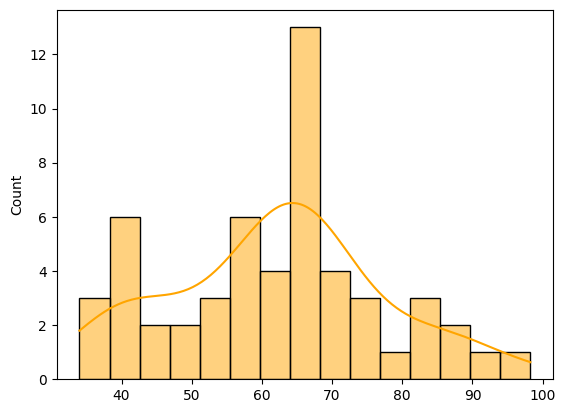

In [18]:
# Histograma y densidad del Grupo 1
print('Grupo 1')
sns.histplot(grupo1, kde=True, color='Orange', label='Grupo 1', bins=15, alpha=0.5)

<Axes: ylabel='Count'>

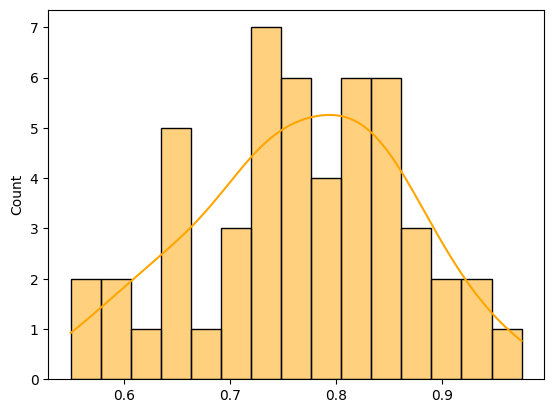

In [12]:
# Histograma y densidad del Grupo 2
sns.histplot(grupo2, kde=True, color='Orange', label='Grupo 2', bins=15, alpha=0.5)

In [13]:
# 1. Descriptivos
descriptivos = pd.DataFrame({
    'Media': [np.mean(grupo1), np.mean(grupo2)],
    'Mediana': [np.median(grupo1), np.median(grupo2)],
    'Asimetría': [stats.skew(grupo1), stats.skew(grupo2)]
}, index=['Grupo 1', 'Grupo 2'])
print("Descriptivos:\n", descriptivos, "\n")


Descriptivos:
              Media  Mediana  Asimetría
Grupo 1  62.138407   64.523   0.116004
Grupo 2   0.767137    0.776  -0.214671 



In [19]:
# 2. Prueba de normalidad (Shapiro-Wilk)
shapiro_g1 = stats.shapiro(grupo1)
shapiro_g2 = stats.shapiro(grupo2)

print("Normalidad Grupo 1 (H0: datos normales):", shapiro_g1)
print("Normalidad Grupo 2 (H0: datos normales):", shapiro_g2)

Normalidad Grupo 1 (H0: datos normales): ShapiroResult(statistic=np.float64(0.9687964268507675), pvalue=np.float64(0.17055332559280867))
Normalidad Grupo 2 (H0: datos normales): ShapiroResult(statistic=np.float64(0.9873726066759126), pvalue=np.float64(0.8597766838171313))


Normalidad: Shapiro-Wilk, H0 = los datos siguen distribución normal.
No se rechaza la hipotesis por que el pavlor es 0.17>0.05 para el grupo 1
No se rechaza la hipotesis por que el pavlor es 0.85>0.05 para el grupo 2

Se concluye que tienen una distribución normal

In [15]:
# 3. Prueba de hipótesis de diferencia de medias
# H0: medias iguales, H1: medias diferentes

# 3a. Prueba paramétrica (t-test independiente)
ttest = stats.ttest_ind(grupo1, grupo2, equal_var=False)  # Welch por si varianzas distintas
print("T-test independiente:", ttest)

T-test independiente: TtestResult(statistic=np.float64(30.079193749049605), pvalue=np.float64(5.465671126086533e-35), df=np.float64(53.00478458068807))


In [ ]:
Prueba de diferencia de grupos parametrica:
Se rechaza la hipotesis de que las medias son iguales pues el pvalor es muy pequeño y se puede calcualar por que las dos muestras tienen
una distribucón normal

In [17]:
# 3b. Prueba no paramétrica (Mann-Whitney U)
mannwhitney = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')
print("Mann-Whitney U:", mannwhitney)

Mann-Whitney U: MannwhitneyuResult(statistic=np.float64(2754.0), pvalue=np.float64(1.0896198859914032e-18))


In [ ]:
Prueba de diferencia de grupos no parametrica:
Se rechaza la hipotesis de que las medias son iguales pues el pvalor es muy pequeño 

# Ejercicio 2B

In [22]:
# Datos
x = np.array([2,1,20,21,33,35,37,36,39,38,32,28,27,36,35,34,37,38,39,37,38,39,55,52,35])
y = np.array([0,0,25000,26000,30000,18000,18000,18000,15000,15000,29000,28000,26000,17000,
              16000,18000,19000,16000,14000,19000,14000,13000,55000,48000,15000])

print(x)
print(y)

[ 2  1 20 21 33 35 37 36 39 38 32 28 27 36 35 34 37 38 39 37 38 39 55 52
 35]
[    0     0 25000 26000 30000 18000 18000 18000 15000 15000 29000 28000
 26000 17000 16000 18000 19000 16000 14000 19000 14000 13000 55000 48000
 15000]


In [23]:
# 1. Descriptivos
descriptivos = pd.DataFrame({
    'Media': [np.mean(x), np.mean(y)],
    'Mediana': [np.median(x), np.median(y)],
    'Asimetría': [stats.skew(x), stats.skew(y)]
}, index=['x', 'y'])
print("Descriptivos:\n", descriptivos, "\n")

Descriptivos:
       Media  Mediana  Asimetría
x     32.96     36.0  -1.166099
y  20480.00  18000.0   1.144553 



In [24]:
# 2. Prueba de normalidad (Shapiro-Wilk)
shapiro_x = stats.shapiro(x)
shapiro_y = stats.shapiro(y)

print("Normalidad X (H0: datos normales):", shapiro_x)
print("Normalidad Y (H0: datos normales):", shapiro_y, "\n")


Normalidad X (H0: datos normales): ShapiroResult(statistic=np.float64(0.8287913513169184), pvalue=np.float64(0.0007153510661753733))
Normalidad Y (H0: datos normales): ShapiroResult(statistic=np.float64(0.8562040682202894), pvalue=np.float64(0.0023151435797654405)) 



In [26]:
# 3. Análisis de correlación (Pearson y Spearman)
pearson_corr = stats.pearsonr(x, y)
spearman_corr = stats.spearmanr(x, y)

print("Correlación Pearson:", pearson_corr)
print("Correlación Spearman:", spearman_corr, "\n")

Correlación Pearson: PearsonRResult(statistic=np.float64(0.6123541588040033), pvalue=np.float64(0.0011394410327861633))
Correlación Spearman: SignificanceResult(statistic=np.float64(-0.06332301017133847), pvalue=np.float64(0.7636376530870979)) 



In [27]:
# 4. Regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"Regresión lineal: y = {slope:.2f}x + {intercept:.2f}")
print(f"R² = {r_value**2:.4f}, p-valor = {p_value:.4f}")

Regresión lineal: y = 606.43x + 491.96
R² = 0.3750, p-valor = 0.0011


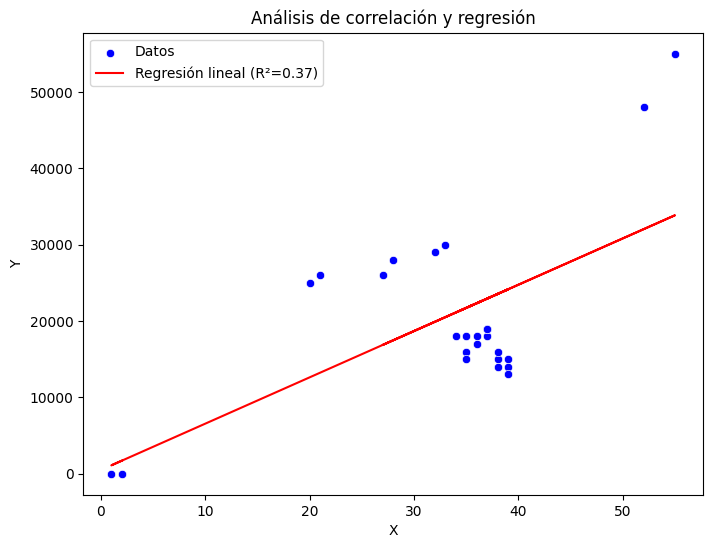

In [28]:
# 5. Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y, color='blue', label='Datos')
plt.plot(x, intercept + slope*x, color='red', label=f'Regresión lineal (R²={r_value**2:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Análisis de correlación y regresión')
plt.legend()
plt.show()